In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Membaca file CSV
df = pd.read_csv('bmkg_forecast_raw.csv')

In [68]:
# Melihat info awal data
print("== Info Data Awal ==")
print(df.info())

== Info Data Awal ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kota             95 non-null     object 
 1   utc_datetime     95 non-null     object 
 2   local_datetime   95 non-null     object 
 3   t                95 non-null     int64  
 4   hu               95 non-null     int64  
 5   weather_desc     95 non-null     object 
 6   weather_desc_en  95 non-null     object 
 7   ws               95 non-null     float64
 8   wd               95 non-null     object 
 9   tcc              95 non-null     int64  
 10  vs_text          95 non-null     object 
 11  analysis_date    95 non-null     object 
dtypes: float64(1), int64(3), object(8)
memory usage: 9.0+ KB
None


Menunjukkan struktur dataset yang terdiri dari 95 baris dan 12 kolom dengan tipe data yang benar (string, numerik, datetime). Semua kolom tampak lengkap tanpa nilai kosong yang terdeteksi

In [69]:
# Cek jumlah missing value sebelum cleaning
print("\n== Jumlah Missing Value Sebelum Cleaning ==")
print(df.isna().sum())


== Jumlah Missing Value Sebelum Cleaning ==
kota               0
utc_datetime       0
local_datetime     0
t                  0
hu                 0
weather_desc       0
weather_desc_en    0
ws                 0
wd                 0
tcc                0
vs_text            0
analysis_date      0
dtype: int64


Mengonfirmasi tidak ada missing value (semua bernilai 0), yang berarti dataset sudah lengkap dan tidak memerlukan pengisian nilai kosong.

In [70]:
# Konversi kolom waktu ke datetime
df['utc_datetime'] = pd.to_datetime(df['utc_datetime'])
df['local_datetime'] = pd.to_datetime(df['local_datetime'])

Mengonversi kolom tanggal dan waktu dari string menjadi tipe datetime supaya mudah dipakai untuk analisis waktu.

In [71]:
# EDA statistik deskriptif
print("\n== Statistik Deskriptif Data ==")
print(df.describe(include='all'))


== Statistik Deskriptif Data ==
           kota         utc_datetime                 local_datetime  \
count        95                   95                             95   
unique        5                  NaN                            NaN   
top     Jakarta                  NaN                            NaN   
freq         19                  NaN                            NaN   
mean        NaN  2025-10-22 11:00:00  2025-10-22 18:00:00.000000256   
min         NaN  2025-10-21 08:00:00            2025-10-21 15:00:00   
25%         NaN  2025-10-21 20:00:00            2025-10-22 03:00:00   
50%         NaN  2025-10-22 11:00:00            2025-10-22 18:00:00   
75%         NaN  2025-10-23 02:00:00            2025-10-23 09:00:00   
max         NaN  2025-10-23 14:00:00            2025-10-23 21:00:00   
std         NaN                  NaN                            NaN   

                t         hu weather_desc weather_desc_en         ws   wd  \
count   95.000000  95.000000         

* Jumlah data valid, frekuensi kategori, dan kategori yang paling sering muncul pada kolom teks.

* Rata-rata, min, max, dan standar deviasi untuk kolom numerik seperti suhu dan kelembapan yang memberikan gambaran sebaran nilai.

* Informasi waktu minimal dan maksimal memberikan rentang periode data prakiraan selama 3 hari.

In [72]:
# Cek ada berapa duplikat
print("\n== Jumlah Duplikat ==")
print(df.duplicated().sum())



== Jumlah Duplikat ==
0


Nilai 0 berarti tidak ada data yang duplikat, sehingga dataset bebas dari pengulangan baris yang bisa mengganggu analisis.

In [73]:
# Cek tipe data tiap kolom
print("\n== Tipe Data Per Kolom ==")
print(df.dtypes)


== Tipe Data Per Kolom ==
kota                       object
utc_datetime       datetime64[ns]
local_datetime     datetime64[ns]
t                           int64
hu                          int64
weather_desc               object
weather_desc_en            object
ws                        float64
wd                         object
tcc                         int64
vs_text                    object
analysis_date              object
dtype: object


In [74]:
# Cek nilai unik di kolom kategori
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique value counts di kolom '{col}':")
    print(df[col].value_counts())


Unique value counts di kolom 'kota':
kota
Jakarta      19
Tangerang    19
Depok        19
Bogor        19
Bandung      19
Name: count, dtype: int64

Unique value counts di kolom 'weather_desc':
weather_desc
Berawan          57
Hujan Ringan     26
Hujan Petir       5
Hujan Sedang      3
Petir             3
Cerah Berawan     1
Name: count, dtype: int64

Unique value counts di kolom 'weather_desc_en':
weather_desc_en
Mostly Cloudy    57
Light Rain       26
Thunderstorm      5
Moderate Rain     3
Thunder           3
Partly Cloudy     1
Name: count, dtype: int64

Unique value counts di kolom 'wd':
wd
SE    18
NE    16
SW    16
S     14
NW    12
N      9
E      7
W      3
Name: count, dtype: int64

Unique value counts di kolom 'vs_text':
vs_text
> 10 km    53
< 10 km    25
< 7 km      8
< 9 km      3
< 6 km      3
< 8 km      3
Name: count, dtype: int64

Unique value counts di kolom 'analysis_date':
analysis_date
2025-10-21T00:00:00    95
Name: count, dtype: int64


In [75]:
# Statistik numerik untuk cek outlier
print("\n== Statistik Numerik ==")
print(df.describe())


== Statistik Numerik ==


              utc_datetime                 local_datetime          t  \
count                   95                             95  95.000000   
mean   2025-10-22 11:00:00  2025-10-22 18:00:00.000000256  25.694737   
min    2025-10-21 08:00:00            2025-10-21 15:00:00  20.000000   
25%    2025-10-21 20:00:00            2025-10-22 03:00:00  23.000000   
50%    2025-10-22 11:00:00            2025-10-22 18:00:00  26.000000   
75%    2025-10-23 02:00:00            2025-10-23 09:00:00  28.000000   
max    2025-10-23 14:00:00            2025-10-23 21:00:00  34.000000   
std                    NaN                            NaN   3.271650   

              hu         ws         tcc  
count  95.000000  95.000000   95.000000  
mean   85.147368   4.269474   98.757895  
min    60.000000   0.500000   75.000000  
25%    79.500000   1.750000  100.000000  
50%    88.000000   3.200000  100.000000  
75%    92.000000   6.000000  100.000000  
max    98.000000  13.000000  100.000000  
std     9.77618

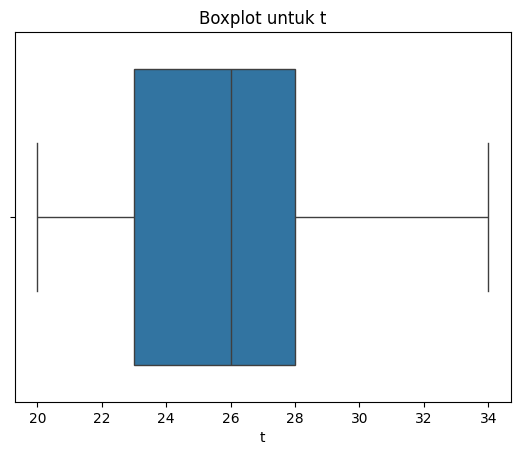

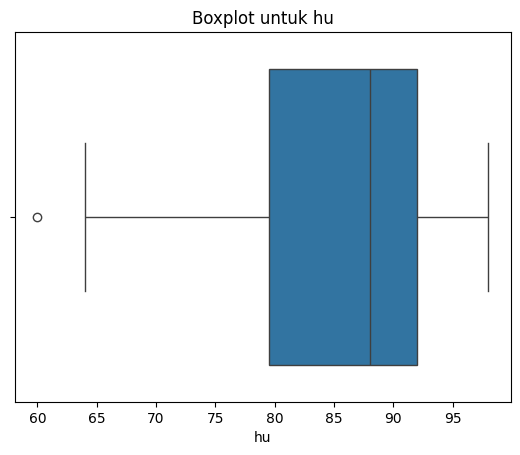

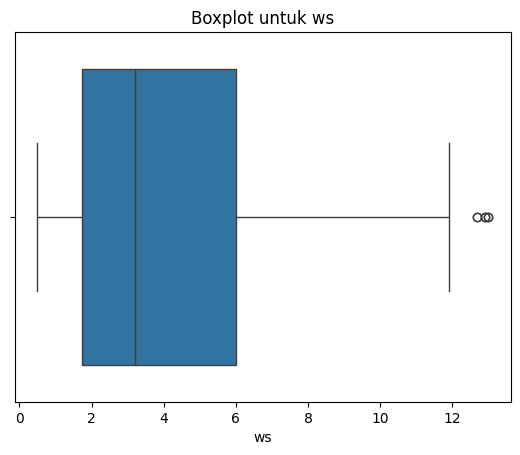

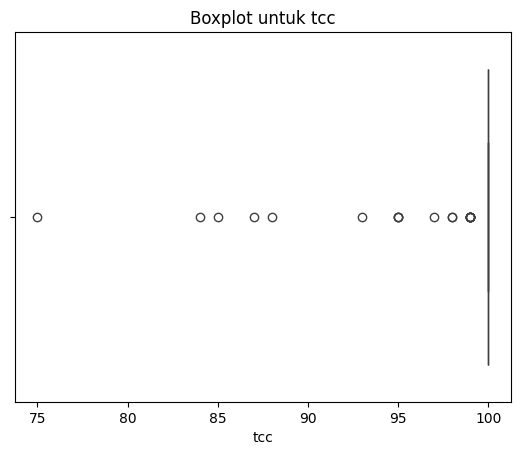

In [76]:
# Visualisasi Boxplot outlier tiap kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk {col}')
    plt.show()

In [77]:
# Lihat 5 baris pertama data yang sudah dibersihkan
print("\n== Preview Data Bersih ==")
print(df.head())


== Preview Data Bersih ==
      kota        utc_datetime      local_datetime   t  hu  weather_desc  \
0  Jakarta 2025-10-21 08:00:00 2025-10-21 15:00:00  29  71  Hujan Ringan   
1  Jakarta 2025-10-21 11:00:00 2025-10-21 18:00:00  27  84       Berawan   
2  Jakarta 2025-10-21 14:00:00 2025-10-21 21:00:00  27  86       Berawan   
3  Jakarta 2025-10-21 17:00:00 2025-10-22 00:00:00  26  90       Berawan   
4  Jakarta 2025-10-21 20:00:00 2025-10-22 03:00:00  26  92       Berawan   

  weather_desc_en   ws  wd  tcc  vs_text        analysis_date  
0      Light Rain  4.0   S   84  > 10 km  2025-10-21T00:00:00  
1   Mostly Cloudy  0.9  SE   99   < 9 km  2025-10-21T00:00:00  
2   Mostly Cloudy  5.0  NE  100  > 10 km  2025-10-21T00:00:00  
3   Mostly Cloudy  2.1  SE  100  > 10 km  2025-10-21T00:00:00  
4   Mostly Cloudy  1.9  NE  100  > 10 km  2025-10-21T00:00:00  


In [78]:
# Simpan data yang sudah bersih ke file CSV baru
df.to_csv('bmkg_forecast_clean.csv', index=False)

print("\nData sudah dibersihkan dan disimpan sebagai bmkg_forecast_clean.csv")


Data sudah dibersihkan dan disimpan sebagai bmkg_forecast_clean.csv


* Dataset sudah lengkap tanpa missing value sehingga data siap untuk dianalisis tanpa pengisian nilai kosong.

* Data tidak mengandung duplikasi baris yang dapat mengganggu hasil analisis.

* Tipe data sudah sesuai dengan kolomnya, termasuk konversi ke tipe datetime untuk analisis waktu.

* Distribusi kategori di kolom teks (seperti kota, deskripsi cuaca, arah angin) sudah teridentifikasi dengan jelas dan seimbang.

* Tidak ditemukan outlier ekstrim secara visual di kolom numerik berdasarkan boxplot.

* Data sudah bersih, konsisten, dan valid sehingga layak untuk tahap analisis lanjutan atau visualisasi.